# Depth of ANN Definition

> from: [[Source](https://datascience.stackexchange.com/questions/14027/counting-the-number-of-layers-in-a-neural-network)] 
>
> Input layer is a layer, it's not wrong to say that.
> 
> However, when calculating the depth of a deep neural network, we only consider the layers that have tunable weights.


# UAT

> A feedforward network with a single layer is sufficient to represent any function, but the layer may be infeasibly large and may fail to learn and generalize correctly.

    — Ian Goodfellow, DLB

# Online versus Batch learning

![Hinton Online versus Batch learning zig zag constraints](https://slideplayer.com/slide/6097875/18/images/11/Online+versus+batch+learning.jpg)

# Erklärung zu NeuralNetwork in numpy

In [11]:
import numpy as np

In [24]:
# initialize weight matrices
layer=[1,10,1]
weight_L1zuL2=np.random.randn(layer[0+1],layer[0])
weight_L2zuL3=np.random.randn(layer[1+1],layer[1])

In [35]:
# construct weight tensor
weights=[]
weights.append(weight_L1zuL2)
weights.append(weight_L2zuL3)

In [36]:
# weight tensor
weights

[array([[ 0.36230993],
        [ 1.03101203],
        [-1.42677305],
        [-0.78497715],
        [-0.77183381],
        [-0.25876917],
        [ 0.59590358],
        [ 0.22608001],
        [ 0.89552097],
        [ 1.76104799]]),
 array([[ 0.18158636,  0.76247564,  0.03074861,  1.17271327,  0.24022962,
          1.05575277, -0.48346829,  0.03496241,  1.36294595,  0.21159984]])]

In [40]:
# weight tensor ist eine Liste und kein numpy array! (Eine Liste von numpy arrays sozusagen)
type(weights)

list

In [41]:
type(weights[0])

numpy.ndarray

In [98]:
weights[0].shape

(10, 1)

In [57]:
# training data
X = 2*np.pi*np.random.rand(1000).reshape(1, -1)  # reshape column vector to row vector
y = np.sin(X)

`X` muss ein Zeilenvektor sein, weil `weights[0]` die Form `(10,1)` (i.e. Spaltenvektor) hat und das dot product `weights[0].dot(X)` sonst nicht das gewünschte dot product wäre (s.u. section 'Batch oder online learning')! 

In [48]:
# warum reshape ?
print(X.shape)
X_ohne_reshape = 2*np.pi*np.random.rand(1000)
print(X_ohne_reshape.shape)

(1, 1000)
(1000,)


In [56]:
X_anderes_reshape = 2*np.pi*np.random.rand(1000).reshape((1, -1)) # Doppelte Klammer reshape((1,-1)) nicht nötig 
X_anderes_reshape.shape

(1, 1000)

In [55]:
a=np.arange(10).reshape(2,5) # Doppelte Klammer reshape((2,5)) nicht nötig 
a

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

## Batch oder Online learning ?

**Weight updates are performed after each Mini-batch !** => **Minibatch algorithm**

## Welche Dimension haben die pre-nonlinearity activations ?

Wir wollen $$\bf{W}\cdot \bf{X}_{Minibatch}=\bf{Y}_{Minibatch}$$ berechnen, wobei $\bf{X}_{Minibatch}$ die $1\times $ `batch_size`-dimensionalen Trainingdaten sind und $\bf{Y}_{Minibatch}$ die $10\times $ `batch_size`-dimensionale Outputmatrix ist (die i-te Spalte von $\bf{Y}_{Minibatch}$ ist der Output für einen forward pass mit input $\bf{X}_i$, die i-te Komponente von $\bf{X}_{Minibatch}$). Wir fassen also in jedem forward pass alle Outputs für `batch_size` Trainingspunkte in eine Matrix $\bf{Y}_{Minibatch}$ zusammen und updaten die weights unter Benutzung von $\bf{Y}_{Minibatch}$. 

## Matrixmultiplikation WX+b

In [59]:
# pre-nonlinearity activation of input layer
weights[0].dot(X)

array([[ 1.82218119,  1.68440298,  2.05690932, ...,  1.41028044,
         0.6709957 ,  2.22184378],
       [ 5.18531395,  4.79324358,  5.85327115, ...,  4.01318313,
         1.90942776,  6.32261907],
       [-7.17573216, -6.6331629 , -8.1000893 , ..., -5.55367091,
        -2.64237466, -8.74959963],
       ...,
       [ 1.1370341 ,  1.05106103,  1.28350356, ...,  0.8800096 ,
         0.41869875,  1.38642203],
       [ 4.50388282,  4.16333661,  5.08406003, ...,  3.48578827,
         1.65849917,  5.49172831],
       [ 8.85691575,  8.18722934,  9.99783812, ...,  6.854826  ,
         3.26144974, 10.79952053]])

In [60]:
weights[0].dot(X).shape

(10, 1000)

In [62]:
# construct biases
b_1zu2 = np.random.randn(layer[1], 1)
b_2zu3 = np.random.randn(layer[2], 1)
b=[]
b.append(b_1zu2)
b.append(b_2zu3)

In [184]:
# activation of input layer
import NeuralNetwork
activation_function1 = NeuralNetwork.NeuralNetwork.getActivationFunction('sigmoid')
activation_function(weights[0].dot(X)+b[0])

array([[6.91116328e-01, 8.75229958e-01, 7.62662213e-01, ...,
        8.63748571e-01, 8.99121019e-01, 9.40039741e-01],
       [3.22576044e-01, 9.24818897e-01, 5.71539702e-01, ...,
        9.02174156e-01, 9.60501107e-01, 9.91823281e-01],
       [1.31896437e-01, 1.68530677e-03, 3.52366203e-02, ...,
        2.50874556e-03, 6.56981256e-04, 7.11140288e-05],
       ...,
       [2.94249264e-01, 4.59634882e-01, 3.43224816e-01, ...,
        4.43990419e-01, 4.96905813e-01, 5.84195688e-01],
       [3.56305623e-01, 9.03165533e-01, 5.75246252e-01, ...,
        8.78966746e-01, 9.44002916e-01, 9.85524364e-01],
       [6.13038739e-01, 9.97562114e-01, 9.01994421e-01, ...,
        9.96018558e-01, 9.99237550e-01, 9.99950979e-01]])

In [185]:
# Compute activation of next layer (= first hidden layer) 
# which is also the final output of the first forward pass
activation_function2 = NeuralNetwork.NeuralNetwork.getActivationFunction('linear')
a_L1 = activation_function1(weights[0].dot(X)+b[0])
a_L2 = activation_function2(weights[1].dot(a_L1)+b[1])
a_L2.shape

(1, 1000)

## How to implement Mini-batch ?

In [151]:
def Train(x, y, batch_size=10, epochs=100, lr = 0.01):
    i=0
    while i<len(y[0]):
        x_batch=x[0][i:i+batch_size].reshape(1,-1)
        y_batch=y[0][i:i+batch_size].reshape(1,-1)
        # for debug
        if i<=5*batch_size: 
            print(x_batch.shape)
        i+=batch_size

In [152]:
Train(X,y)

(1, 10)
(1, 10)
(1, 10)
(1, 10)
(1, 10)
(1, 10)


### What happens, if we define `some_list=[1,2,3]` and we call `some_list[0:100]` ?

In [150]:
a=[1,2,3]
a[0:100]

[1, 2, 3]

### What happens, if the used `batch_size` value is too large (i.e. larger than `len(X)`) ?

In [140]:
X[0].shape

(1000,)

In [139]:
Train(X,y,batch_size=50)

(1, 50)


### Welche Form hat der Output von `.feedforward()`?

100%|██████████| 2000/2000 [00:06<00:00, 286.60it/s]


loss = 4.665356156175609


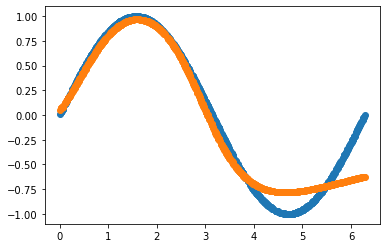

In [155]:
import NeuralNetwork2
import matplotlib.pyplot as plt
nn = NeuralNetwork2.NeuralNetwork([1, 10, 10, 1],activations=['sigmoid', 'sigmoid', 'linear'])
X = 2*np.pi*np.random.rand(1000).reshape(1, -1)
y = np.sin(X)    

nn.train(X, y, epochs=2000, batch_size=1000, lr = .5)
_, a_s = nn.feedforward(X)
#print(y, X)
plt.scatter(X.flatten(), y.flatten())
plt.scatter(X.flatten(), a_s[-1].flatten())
plt.show()

**Merke:** `.shape` ist für `np.arrays` und `len()` ist für **Listen** !

**Merke**: Alle Objekte sind **Listen**, außer folgende **np.arrays**:
- Input `X` und Mini-batches `x_batch`
- Targets `y` und `y_batch`
- pre- (`z_s`) und post-nonlinearity activations (`a_s`)

In [170]:
# gibt eine Liste mit 2 Listen (z_s und a_s) zurück
len(NeuralNetwork.NeuralNetwork.feedforward(nn,X)) 

2

In [164]:
z_s, a_s = NeuralNetwork.NeuralNetwork.feedforward(nn,X)

In [169]:
# gibt eine Liste mit 3 np.arrays (die pre-nonlinearity activations
# für jeden Layer) zurück
len(z_s)

3

In [168]:
# gibt ein np.array zurück (pre-nonlinearity activation Wx+b des input layers)
z_s[0].shape

(10, 1000)

## Backprop
Hinton alle slides: [[Source](https://www.cs.toronto.edu/~tijmen/csc321/slides/lecture_slides_lec3.pdf)]

Initialize list for `deltas[j]` $=\frac{\partial E}{\partial z_j}$ (1. Zeile auf Hinton Folie), where $z_j=$ `z_s[j]` and $y_j=$ `a_s[j]`.

In [78]:
deltas=[None]*len(weights)
deltas

[None, None]

Quote von Hinton Folie:

> $$E=\frac{1}{2}\sum_{j\in output}(t_j-y_j)^2$$
> $$\frac{\partial E}{\partial y_j}=-(t_j-y_j)$$

dh. die $y_j$ sind die post-nonlinearity activations!

$E$ wird **nicht** berechnet, nur $$\frac{\partial E}{\partial y_j}=-(t_j-y_j)$$ (nämlich in `.backpropagation()`), weil man für die weight updates nur die Gradienten von $E$ braucht und nicht $E$ selbst!

### Wofür steht j ?

`j` geht jeweils über alle x-Werte in `x_batch`, d.h. `j`$=1\,,\dotso\,,$ `batch_size`, 

(**Achtung**: Bei `deltas[j]`, `z_s[j]` und `a_s[j]` steht das `j` für den **Layer** und hat nichts mit dem $j$ in $=\frac{\partial E}{\partial z_j}$, $z_j$ und $y_j$ zu tun, was für einen x-Wert im batch steht.

### Matrix Shapes, dot products and Hadamard (element-wise) products

**Achtung**: Matrix product geht nicht, wenn einer der beiden np.arrays einfach nur transponiert wird:

In [242]:
bla1=np.arange(4).T
bla2=np.arange(4)
bla1.dot(bla2)

14

In [248]:
# .T geht nur bei Matrizen, nicht bei Vektoren !
bla1.T

array([0, 1, 2, 3])

Stattdessen muss man `.reshape(1,-1)` anwenden:

In [251]:
bla3=np.arange(4).reshape(1,-1).T
bla4=np.arange(4).reshape(1,-1)
bla3.dot(bla4)

array([[0, 0, 0, 0],
       [0, 1, 2, 3],
       [0, 2, 4, 6],
       [0, 3, 6, 9]])

**Achtung**: Bei .dot auf dim aufpassen:

In [194]:
weights[1].shape

(1, 10)

In [210]:
vec=np.arange(0,10).reshape(1,-1)
vec.shape

(1, 10)

In [307]:
# geht
# normal matrix product (nur komisch weil (10x1) x (1x10) ungewohnt, aber 
# recall, zB. (10x3) x (3x10) ging ja auch immer)
weights[1].T.dot(vec).shape

(10, 10)

In [213]:
# geht nicht: Dimensionsfehler
weights[1].dot(vec)

ValueError: shapes (1,10) and (1,10) not aligned: 10 (dim 1) != 1 (dim 0)

In [253]:
# Shape of transpose matrix
weights[1].T.shape

(10, 1)

Check matrix product:

In [305]:
# Element [1][6] of matrix
weights[1].T.dot(vec)[1][6]

4.5748538274623725

In [306]:
# compute element [1][6] manually
vec[0][6]*weights[1][0][1]

4.5748538274623725

### Backprop in einzelnen Schritten rekonstruiert (Zeile 1 und 2 Hinton)

In [190]:
# define getDerivativeActivationFunction for convenience
deriv = lambda p: NeuralNetwork.NeuralNetwork.getDerivitiveActivationFunction('linear')(p)
# define prenon_activations for convenience
prenon_activation_L2 = weights[1].dot(a_L1)+b[1]
prenon_activation_L1 = weights[0].dot(X)+b[0]

In [192]:
# Compute delta of last layer
deltas[-1] = (-(y-a_L2)*deriv(prenon_activation_L2))

***********

**Note**: In the following `weights[1].T.dot(deltas[-1])` is a matrix product! The shapes of the matrices are

In [257]:
weights[1].shape

(1, 10)

In [304]:
deltas[-1].shape # Eine Spalte für jeden x-Wert im Batch [bzw. für jeden entsprechenden output y-Wert]

(1, 1000)

and, hence, the dimension of their product is $(1 \times 10)^T\odot (1 \times 1000)$. Eine Spalte für jeden x-Wert im Batch also 1000 Spalten.

In [308]:
weights[1].T.dot(deltas[1]).shape

(10, 1000)

In [310]:
deriv(prenon_activation_L1)

1

**********

In [239]:
# backpropagate this delta to previous layer
i=range(len(deltas)-1)
i=i[-1]
deltas[i]=weights[i+1].T.dot(deltas[i+1])*deriv(prenon_activation_L1)

### Return Error derivatives wrt weights (Zeile 3 Hinton)

Die letzte activation, i.e. `activations[2]=a_L2` des Output Layers, brauchen wir nicht für $\frac{\partial E}{\partial w_{ij}}$ [s. in Hinton Zeile 3 steht $y_i$ (activation of **previous** layer) und nicht $y_j$ (activation of current layer)].

> Goodfellow Algo 6.4, Backprop: 
>
> $$\nabla_{\bf{W}^{(k)}} J=\bf{g}{\bf{h}^{(k-1)}}^T$$

Auch hier startet die $\frac{\partial E}{\partial w_{ij}}$ Rechnung bei $k-1$ ($k=l,l-1,\dotso,1$), also mit der vorletzten activation $\bf{h}^{(l-1)}$.

In [298]:
# Diese activation geht nicht dE/dw ein !
activations=[X,a_L1,a_L2]
activations[2].shape

(1, 1000)

In [299]:
# Die vorletzte activation aber schon
activations=[X,a_L1,a_L2]
activations[1].shape

(10, 1000)

Dies ist $\frac{\partial E}{\partial z_j}$ ist `deltas[j]` (wobei `j` der current layer ist):

In [300]:
deltas[1].shape

(1, 1000)

**Achtung**: `len(deltas)=2` und `len(activations)=3`, sodass `i` im folgenden Code nur die ersten beiden activations anspricht (die Output layer activation soll ja nicht in die Rechnung eingehen, wie gerade oben in dieser Section gesagt).

In [267]:
# return Error derivatives wrt weights
dw=[]
db=[]
dw=[d.dot(activations[i].T) for i, d in enumerate(deltas)]

In [297]:
print('The dot product d.dot(activations[i].T) has dimensions:')
print(deltas[1].shape, ' x ', activations[1].T.shape)
print('The resulting product has dimensions:')
print(deltas[1].dot(activations[1].T).shape)

The dot product d.dot(activations[i].T) has dimensions:
(1, 1000)  x  (1000, 10)
The resulting product has dimensions:
(1, 10)


********
How does `enumerate()` work?

In [280]:
# how does enumerate work
r=[2,3,13]
list(enumerate(r))

[(0, 2), (1, 3), (2, 13)]

In [279]:
objekt1, objekt2 = list(enumerate(r))[0]
objekt1

0

***********

### Interpretation der Hinton Folie

**Achtung**: Hintons `i` ist sozusagen `j-1`. Hinton will folgenden Algo mit der Folie beschreiben: 
1. Compute for all j $$\frac{\partial E}{\partial z_{j}}=\left[y_{j}(1-y_{j})\right]_{y_j=\sigma(\text{z_s[-1]})}\frac{\partial E}{\partial y_j}\quad \text{for }j=1\,,\dotso\,,\text{batch_size}$$
(where $\frac{\partial E}{\partial y_j}=-(t_j-y_j)$ (np.array with dimension ($1$, `batch_size`)) and $y_{j}(1-y_{j})$ can be computed using the forward pass results).

`z_s[-1]` is the **PRE**-nonlinearity activation of the last layer [könnte man aber auch mit `a_s[-1]` implementieren, man müsste dann nur `.getDerivitiveActivationFunction()` umschreiben].

2. Compute **dot product** of the weight matrix which connects layer `j` and `j-1` and $\frac{\partial E}{\partial z_{j}}$ from step 1: $$\frac{\partial E}{\partial y_{j-1}}=\sum_j w_{j-1,j}\underbrace{\frac{\partial E}{\partial z_j}}_\text{bereits in 1. Zeile berechnet}$$
or in other words: `self.weights[i+1].T.dot(deltas[i+1])`
3. Nicht auf Folie, aber Hinton meint: Repeat step 1: Use $\frac{\partial E}{\partial y_{j-1}}$ from step 2 to calculate $$\frac{\partial E}{\partial z_{j-1}}$$
or in other words compute $$\frac{\partial E}{\partial z_{j-1}}=y_{j-1}(1-y_{j-1})\underbrace{\left(\sum_j w_{j-1,j}\frac{\partial E}{\partial z_j}\right)}_\text{bereits in 2. Zeile berechnet}$$
4. Use $\frac{\partial E}{\partial z_{j}}$ from step 1 to compute for all `j` (i.e. for all points in the batch) $$\frac{\partial E}{\partial w_{j-1,j}}=y_{j-1}\frac{\partial E}{\partial z_j}\quad \text{for }j=1\,,\dotso\,,\text{batch_size}$$
which is a normal matrix product `dw = [d.dot(a_s[i].T)/float(batch_size) for i,d in enumerate(deltas)]` because (s. Diskussion und Rekonstruktion zu `dw` oben).

![Hinton Folie Backprop](https://i.stack.imgur.com/OfPD6.png)

Die erste Zeile auf der Folie entspricht

`# insert the last layer error
deltas[-1] = (-(y-a_s[-1])*(self.getDerivitiveActivationFunction(self.activations[-1]))(z_s[-1]))`

Dann wird die 2. Zeile (unter Benutzung des Ergebnisses der 1. Zeile $\frac{\partial E}{\partial z_j}$) ausgeführt, was

`self.weights[i+1].T.dot(deltas[i+1])`

in der `for` loop entspricht. Danach wird rekursiv wieder die 1. Zeile (unter Benutzung des Ergebnisses der 2. Zeile $\frac{\partial E}{\partial y_i}$) ausgeführt, d.h. $$\frac{\partial E}{\partial z_{j-1}}=y_{j-1}(1-y_{j-1})\underbrace{\left(\sum_j w_{j-1,j}\frac{\partial E}{\partial z_j}\right)}_\text{bereits in 2. Zeile berechnet}\,,$$ wobei $y_{j-1}$ die activation der previous layer ist. Dies entspricht

`# Perform BackPropagation
for i in reversed(range(len(deltas)-1)):
    deltas[i] = self.weights[i+1].T.dot(deltas[i+1])*(self.getDerivitiveActivationFunction(self.activations[i])(z_s[i]))        `

und die 3. Zeile entspricht

`dw = [d.dot(a_s[i].T)/float(batch_size) for i,d in enumerate(deltas)]`

wobei `/float(batch_size)`, weil bei Minibatch der loss $E$ mit der batch_size normalized werden muss (s. ML Folie).

### Element-wise product `*`

Scalar multiplication is element-wise:

In [311]:
t=np.arange(4)
t*2

array([0, 2, 4, 6])

Vector multiplication is also element-wise:

In [174]:
k=np.array([1,2,3])
m=np.array([4,5,6])
k*m

array([ 4, 10, 18])

Matrix products **must not** be performed with

In [321]:
# does not work ! use .dot() instead
n=np.array([[1,2,3],[4,5,6]]).T
o=np.array([[1,2,3],[4,5,6]])
n*o

ValueError: operands could not be broadcast together with shapes (3,2) (2,3) 

... although it works with one-dimensional matrices:

In [322]:
# bad coding style
n2=np.array([[1,2,3]]).T
o2=np.array([[1,2,3]])
n2*o2

array([[1, 2, 3],
       [2, 4, 6],
       [3, 6, 9]])

### zu .getDerivitiveActivationFunction()

In [324]:
# conditional np.array filtering
q=np.array([13,-14,15,-16])
q[q<0]

array([-14, -16])

# Why Shuffling ?

[Source](https://datascience.stackexchange.com/questions/24511/why-should-the-data-be-shuffled-for-machine-learning-tasks?newreg=cf6d76873092423c93d59539b758c42d)

**Note: throughout this answer I refer to minimization of training loss and I do not discuss stopping criteria such as validation loss. The choice of stopping criteria does not affect the process/concepts described below.**

The process of training a neural network is to find the minimum value of a loss function $\mathcal{L}_X(W)$
, where $W$ represents a matrix (or several matrices) of weights between neurons and $X$ represents the training dataset. I use a subscript for $X$ to indicate that our minimization of $\mathcal{L}$ occurs only over the weights $W$ (that is, we are looking for $W$ such that $\mathcal{L}$ is minimized) while $X$ is fixed.

Now, if we assume that we have $P$ elements in $W$ (that is, there are $P$ weights in the network), $\mathcal{L}$ is a surface in a $P$+1-dimensional space. To give a visual analogue, imagine that we have only two neuron weights ($P$=2). Then $\mathcal{L}$ has an easy geometric interpretation: it is a surface in a 3-dimensional space. This arises from the fact that for any given matrices of weights $W$, the loss function can be evaluated on $X$ and that value becomes the elevation of the surface.

But there is the problem of non-convexity; the surface I described will have numerous local minima, and therefore gradient descent algorithms are susceptible to becoming "stuck" in those minima while a deeper/lower/better solution may lie nearby. This is likely to occur if $X$ is unchanged over all training iterations, because the surface is fixed for a given $X$; all its features are static, including its various minima.

A solution to this is mini-batch training combined with shuffling. By shuffling the rows and training on only a subset of them during a given iteration, $X$ changes with every iteration, and it is actually quite possible that no two iterations over the entire sequence of training iterations and epochs will be performed on the exact same $X$. The effect is that the solver can easily "bounce" out of a local minimum. Imagine that the solver is stuck in a local minimum at iteration 𝑖 with training mini-batch $X_i$. This local minimum corresponds to $\mathcal{L}$ evaluated at a particular value of weights; we'll call it $\mathcal{L}_{X_i}(W_i)$. On the next iteration the shape of our loss surface actually changes because we are using $X_{i+1}$, that is, $\mathcal{L}_{X_{i+1}}(W_i)$ may take on a very different value from $\mathcal{L}_{X_i}(W_i)$ and it is quite possible that it does not correspond to a local minimum! We can now compute a gradient update and continue with training. To be clear: the shape of $\mathcal{L}_{X_{i+1}}$ will -- in general -- be different from that of $\mathcal{L}_{X_i}$. Note that here I am referring to the loss function $\mathcal{L}$ evaluated on a training set $X$; it is a complete surface defined over all possible values of $W$, rather than the evaluation of that loss (which is just a scalar) for a specific value of $W$. Note also that if mini-batches are used without shuffling there is still a degree of "diversification" of loss surfaces, but there will be a finite (and relatively small) number of unique error surfaces seen by the solver (specifically, it will see the same exact set of mini-batches -- and therefore loss surfaces -- during each epoch).

One thing I deliberately avoided was a discussion of mini-batch sizes, because there are a million opinions on this and it has significant practical implications (greater parallelization can be achieved with larger batches). However, I believe the following is worth mentioning. Because $\mathcal{L}$ is evaluated by computing a value for each row of $X$ (and summing or taking the average; i.e., a commutative operator) for a given set of weight matrices $W$, the arrangement of the rows of $X$ has no effect when using full-batch gradient descent (that is, when each batch is the full $X$, and iterations and epochs are the same thing).